In [24]:
import random as rd
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
mu1 = -1
mu2 = 3
sig1 = 0.5
sig2 = 1
N = 100

np.random.seed(10)
x11=np.random.randn(N,1)*sig1 + mu1
x12=np.random.randn(N,1)*sig1 + mu1+3
x21=np.random.randn(N,1)*sig2 + mu2
x22=np.random.randn(N,1)*sig2 + mu2+3

c = np.vstack((-np.ones((N,1)), np.ones((N,1))))
x1 = np.hstack((x11,x12))
x2 = np.hstack((x21,x22))

X = np.hstack( (np.vstack( (x1,x2) ),c) )
np.random.shuffle(X)
dataset = pd.DataFrame(data=X, columns=['x','y','c'])

In [26]:
dataset.head()

,x,y,c
0,-0.334207,2.058738,-1.0
1,3.264395,5.636814,1.0
2,-0.669884,1.856185,-1.0
3,1.995284,4.484924,1.0
4,3.588041,4.739172,1.0


In [27]:
dataset.drop("c", axis =1).head(3)

,x,y
0,-0.334207,2.058738
1,3.264395,5.636814
2,-0.669884,1.856185


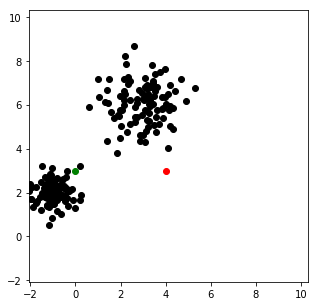

In [28]:
k = 2

centroids = {
    i+1: [np.random.randint(dataset.x.min(), dataset.x.max()), np.random.randint(dataset.y.min(), dataset.y.max())]
    for i in range(k)
}
    
fig = plt.figure(figsize=(5, 5))
plt.scatter(dataset['x'], dataset['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(dataset.x.min(), dataset.x.max()+5)
plt.ylim(dataset.x.min(), dataset.x.max()+5)
plt.show()

In [29]:
centroids

{1: [4, 3], 2: [0, 3]}

          x         y    c  distance_from_1  distance_from_2  closest color
0 -0.334207  2.058738 -1.0         4.435236         0.998834        2     g
1  3.264395  5.636814  1.0         2.737499         4.196315        1     r
2 -0.669884  1.856185 -1.0         4.807924         1.325540        2     g
3  1.995284  4.484924  1.0         2.494772         2.487199        2     g
4  3.588041  4.739172  1.0         1.787297         3.987324        1     r


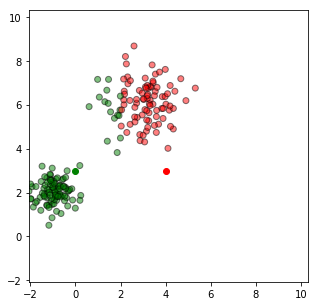

In [30]:
def centroid_match(dataset, centroids):
    for i in centroids.keys():
        dataset['distance_from_{}'.format(i)] = (
            np.sqrt(
                (dataset['x'] - centroids[i][0]) ** 2
                + (dataset['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    dataset['closest'] = dataset.loc[:, centroid_distance_cols].idxmin(axis=1)
    dataset['closest'] = dataset['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    dataset['color'] = dataset['closest'].map(lambda x: colmap[x])
    return dataset

dataset = centroid_match(dataset, centroids)
print(dataset.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(dataset['x'], dataset['y'], color=dataset['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(dataset.x.min(), dataset.x.max()+5)
plt.ylim(dataset.x.min(), dataset.x.max()+5)
plt.show()

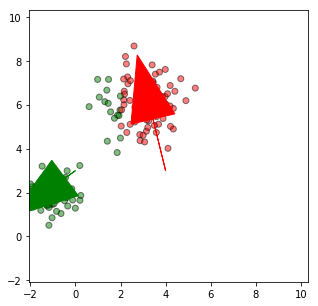

In [31]:
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(dataset[dataset['closest'] == i]['x'])
        centroids[i][1] = np.mean(dataset[dataset['closest'] == i]['y'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(dataset['x'], dataset['y'], color=dataset['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(dataset.x.min(), dataset.x.max()+5)
plt.ylim(dataset.x.min(), dataset.x.max()+5)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

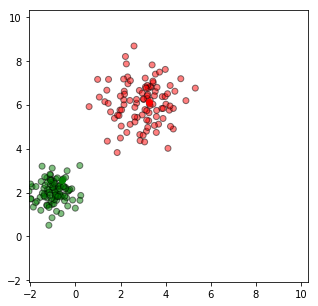

In [32]:
dataset = centroid_match(dataset, centroids)

# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(dataset['x'], dataset['y'], color=dataset['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(dataset.x.min(), dataset.x.max()+5)
plt.ylim(dataset.x.min(), dataset.x.max()+5)
plt.show()


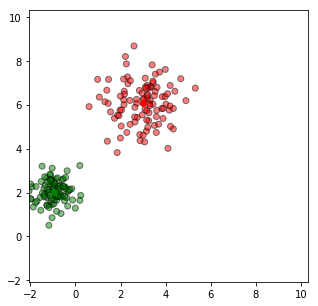

In [33]:
while True:
    closest_centroids = dataset['closest'].copy(deep=True)
    centroids = update(centroids)
    df = centroid_match(dataset, centroids)
    if closest_centroids.equals(dataset['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(dataset['x'], dataset['y'], color=dataset['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(dataset.x.min(), dataset.x.max()+5)
plt.ylim(dataset.x.min(), dataset.x.max()+5)
plt.show()